<a href="https://colab.research.google.com/github/Hoahot/HoangDucHoa19146185/blob/main/B%C3%A0i_t%E1%BA%ADp_l%E1%BB%9Bn_v2_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1, Khai báo các thư viện cần sử dụng ***


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# **2. Kết nối với Google Drive để đọc và lưu dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **3. Khai báo đường dẫn thư mục chứa ảnh dữ liệu**

In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/AI - Btap lớn - Computervision/Data/Train"
valid_image_files_path = "/content/drive/MyDrive/AI - Btap lớn - Computervision/Data/Validation"

# **4. Gán nhãn dữ liệu**

In [ ]:
label=['BoNgua','Camap','Doryfish','Ga','Ho','Huucaoco','Nguavan','Rua','Tegiac','Voi']

# **5. Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

# **6. Đọc dữ liệu train và validation**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(200, 200),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),               
    class_mode='categorical')


Found 1400 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


# **7. Xây dựng mô hình**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  


 
  
# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten()) 
# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(10, activation=tf.nn.softmax)) # 4 đầu ra 

# **8. Thiết lập các tham số để huấn luyện mô hình**

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

# **9. Huấn luyện mô hình**

In [ ]:
EPOCHS=50
history=model.fit(
    train_generator,
    steps_per_epoch=3,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=3)

Epoch 1/50
3/3 [==============================] - 65s 26s/step - loss: 6.5599 - acc: 0.0795 - val_loss: 4.2490 - val_acc: 0.1250
Epoch 2/50
3/3 [==============================] - 54s 22s/step - loss: 3.2446 - acc: 0.1458 - val_loss: 2.1851 - val_acc: 0.1875
Epoch 3/50
3/3 [==============================] - 45s 18s/step - loss: 2.1294 - acc: 0.2083 - val_loss: 2.0101 - val_acc: 0.2500
Epoch 4/50
3/3 [==============================] - 35s 13s/step - loss: 1.9226 - acc: 0.2708 - val_loss: 1.8628 - val_acc: 0.4167
Epoch 5/50
3/3 [==============================] - 31s 11s/step - loss: 1.6253 - acc: 0.4271 - val_loss: 1.7023 - val_acc: 0.3438
Epoch 6/50
3/3 [==============================] - 30s 11s/step - loss: 1.6393 - acc: 0.3854 - val_loss: 1.7555 - val_acc: 0.3750
Epoch 7/50
3/3 [==============================] - 26s 9s/step - loss: 1.3083 - acc: 0.5938 - val_loss: 1.9070 - val_acc: 0.4583
Epoch 8/50
3/3 [==============================] - 20s 6s/step - loss: 1.5194 - acc: 0.4792 - val_l

# **10. Sử dụng mô hình**

Saving 1884138.jpg to 1884138.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Giá trị dự đoán:  Rua


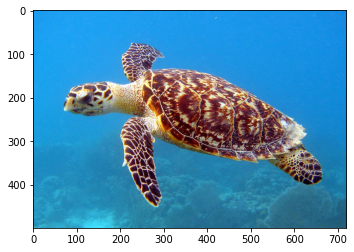

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])